In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [97]:
class RandomForest:
    def __init__(self,n_estimators,params):
        self.n_estimators=n_estimators
        self.params=params
        self.trees=None
        
    def fit(self,x,y):
        n_instances=x.shape[0]
        self.classes=sorted(set(y))
        self.trees=[]
        for n in range(self.n_estimators):
            idx=np.arange(n_instances)
            idx_sample=np.random.choice(idx,n_instances,replace=True)
            xsample=x[idx_sample]
            ysample=y[idx_sample]
            tree=DecisionTreeClassifier(**self.params,max_features='auto')
            tree.fit(xsample,ysample)
            self.trees.append(tree)
            
    def predict(self,x):
        classes=self.trees[0].classes_
        dic={i:cl for i,cl in enumerate(classes)}
        ypred=self.trees[0].predict_proba(x)
        for tree in self.trees[1:]:
            ypred+=tree.predict_proba(x)
        ypred=ypred
        ypred=ypred.argmax(axis=1)
        ypred=np.vectorize(dic.get)(ypred)
        
        return ypred

In [46]:
n1=np.random.normal(0,1,(1000,2))
n2=np.random.normal(2,1,(1000,2))
n3=np.random.normal(4,1,(1000,2))
n=np.concatenate([n1,n2,n3])

y0=np.ones(1000)
y=np.concatenate([0*y0,y0.copy(),2*y0.copy()])

In [102]:
data=pd.DataFrame(data=np.concatenate([n,y.reshape(-1,1)],axis=1),columns=['x','y','target'])
data['target']=data.target.astype('int')

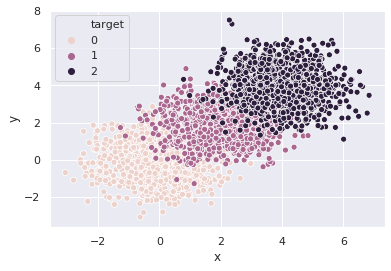

In [103]:
sns.scatterplot(data=data,x='x',y='y',hue='target')

In [50]:
RF=RandomForestClassifier()

In [53]:
RF.n_estimators=3

In [64]:
params={'criterion': 'gini','min_samples_leaf': 1,'min_samples_split': 2}

In [89]:
rf=RandomForest(3,params)

In [98]:
rf.fit(n,y)

In [99]:
ypred=rf.predict(n)

In [100]:
ypred

array([0, 0, 0, ..., 2, 2, 2])

In [54]:
RF.fit(n,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
ypred=RF.predict(n)

In [101]:
accuracy_score(ypred,y)

0.9703333333333334

# UCI Spambase data

In [104]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/joao/.wget-hsts'. HSTS will be disabled.
--2020-11-05 10:38:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data’

spambase.data       100%[===================>] 686.47K   856KB/s    in 0.8s    

2020-11-05 10:38:11 (856 KB/s) - ‘spambase.data’ saved [702942/702942]



In [119]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/joao/.wget-hsts'. HSTS will be disabled.
--2020-11-05 10:41:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3566 (3.5K) [application/x-httpd-php]
Saving to: ‘spambase.names’

spambase.names      100%[===================>]   3.48K  --.-KB/s    in 0s      

2020-11-05 10:41:49 (87.4 MB/s) - ‘spambase.names’ saved [3566/3566]



In [120]:
with open('spambase.names') as file:
    names=file.read()

In [114]:
with open('spambase.data') as file:
    spam=[]
    while True:
        line=file.readline()
        if line=='':
            break
        line=line.rstrip().split(',')
        spam.append(line)

In [140]:
class train_test:
    def __init__(self,x,y):
        self.x=x
        self.y=y
    
    def __call__(self,test_size=0.2):
        n=int(self.x.shape[0]*test_size)
        idx=np.arange(self.x.shape[0])
        np.random.shuffle(idx)
        
        return self.x[idx][:-n],self.y[idx][:-n],self.x[idx][-n:],self.y[idx][-n:]

In [115]:
spam=np.array(spam)

In [122]:
x=spam[:,:-1].astype('float')

In [123]:
y=spam[:,-1].astype('int')

In [141]:
traintest=train_test(x,y)

In [142]:
xtrain,ytrain,xtest,ytest=traintest()

In [127]:
RF=RandomForestClassifier(n_estimators=10)

In [145]:
RF.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
ypred=RF.predict(xtest)

In [149]:
accuracy_score(ypred,ytest)

0.9456521739130435

In [150]:
rf=RandomForest(10,params)

In [151]:
rf.fit(xtrain,ytrain)

In [152]:
ypred=rf.predict(xtest)

In [153]:
accuracy_score(ypred,ytest)

0.9521739130434783